In [1]:
import numpy as np
n = 6
#время 6 полных колебаний ротора
t_rot = np.array([28.20 , 28.28 , 28.37 , 28.50 , 28.40 , 28.59]) # sec
T_rot = t_rot / 6
T_rot_mid = np.mean(T_rot)
sigm_rot = np.std(T_rot) * (n**0.5) / ((n-1)**0.5)
eps = sigm_rot / T_rot_mid
print('среднее время периода ротора ' + str(T_rot_mid))
print('sigma ' + str(sigm_rot))
print('относительная погрешность ' + str(eps))

среднее время периода ротора 4.73166666667
sigma 0.0236643191324
относительная погрешность 0.00500126505088


In [2]:
# эталон 

m_et = 1617.7 #g
d_et = 7.8 #cm 2 * radius
h_et = 4.1 #cm height
n = 6
#время 6 полных колебаний эталона
t_et = np.array([35.97 , 36.06 , 36.25 , 36.03 , 36.25 , 36.10]) 
T_et = t_et / 6
t_et_mid = np.mean(t_et)
print(t_et_mid)
T_et_mid = t_et_mid/6.0
print(T_et_mid)
sigm_et = np.std(T_et) * (n**0.5) / ((n-1)**0.5)
print(sigm_et)
eps_et = sigm_et / T_et_mid
print(eps_et)

36.11
6.01833333333
0.0194079021707
0.00322479681595


In [3]:
m_et = m_et * 1e-03
d_et = d_et * 1e-02

I_et = 0.5 * m_et * (d_et/2)**2
print('I_et=' + str(I_et))

I_et=0.00123026085


$I_{rot} = \frac{T^2_{rot}}{T^2_{et}} I_{et}$

In [4]:
I_rot = T_rot_mid ** 2 / T_et_mid ** 2 * I_et
print('I_rot = ' + str(I_rot))

I_rot = 0.000760454111099


Измерим как влияет сила трения, возникающая в креплении вертикальной оси вращения и внешней части конструкции

In [38]:
t_tr = [2.30, 2.36, 2.11, 1.48, 2.51, 2.18, 2.47, 2.10 ,3.28] #min
n_tr = [1,1,1,1,2,2,3,3,4] # количество оборотов
m_g = [60,76,93,116,141,173,215,268, 335] # g
dh = [3.9, 2.6, 2.0, 1.7, 3.1, 2.2, 2.5, 2.1, 1.3] #cm
R = 18.6 #cmрадус для измерения угла
r = 12.3 #плечо силы

time_tr = [209.0, 156.0, 151.0, 107.0, 95.6, 79.1, 62.0, 50.0, 37.5]

Частота полученная с помощью звукового генератора : 480 Гц

In [7]:
t_tr = np.array(t_tr)
n_tr = np.array(n_tr)
per = t_tr / n_tr

In [8]:
print per

[ 2.3         2.36        2.11        1.48        1.255       1.09
  0.82333333  0.7         0.82      ]


In [10]:
per *= 60

In [11]:
print per

[ 138.   141.6  126.6   88.8   75.3   65.4   49.4   42.    49.2]


In [12]:
import math

In [39]:
time_tr = np.array(time_tr)
omh = 2*math.pi / time_tr

In [54]:
print omh
omh = np.array(omh)

[ 0.03006309  0.04027683  0.0416105   0.05872136  0.0657237   0.07943344
  0.1013417   0.12566371  0.16755161]


In [56]:
masses = m_g*r*9.8

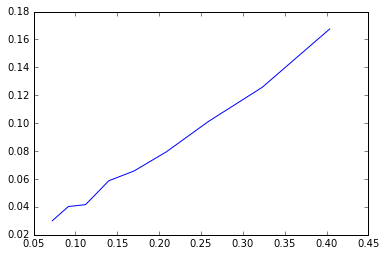

In [58]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(masses, omh)

In [59]:
coef = np.polyfit(masses, omh, 1)

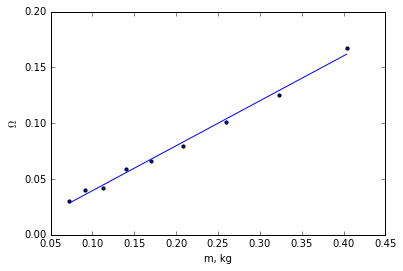

In [69]:
plt.scatter(masses, omh, marker=".", s=40)
xval = np.linspace(np.min(masses), np.max(masses), 100)
yval = [x *coef[0] + coef[1] for x in xval]
plt.plot(xval, yval)
plt.xlabel("m, kg")
plt.ylabel(r"$\Omega$")

In [72]:
w_0 = 9.8*r/coef[0]*I_rot

In [73]:
print w_0

0.00227682785919
